In [304]:
import pandas as pd
import numpy as np

In [305]:
df = pd.concat([
    pd.read_csv("Youtube01-Psy.csv"),
    pd.read_csv("Youtube02-KatyPerry.csv"),
    pd.read_csv("Youtube03-LMFAO.csv"),
    pd.read_csv("Youtube04-Eminem.csv"),
    pd.read_csv("Youtube05-Shakira.csv")
    
])

df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [307]:
df["CONTENT"].iloc[0]


'Huh, anyway check out this you[tube] channel: kobyoshi02'

In [308]:
# Récupérer les valeurs uniques et leurs fréquences dans la colonne "CLASS"
class_counts = df["CLASS"].value_counts()
print("Nombre d'occurrences de chaque valeur unique dans la colonne 'CLASS':")
print(class_counts)
print()

# Calculer les proportions (fréquences relatives) de chaque valeur unique
class_proportions = df["CLASS"].value_counts(normalize=True)
print("Proportions (fréquences relatives) de chaque valeur unique dans la colonne 'CLASS':")
print(class_proportions)
print()


Nombre d'occurrences de chaque valeur unique dans la colonne 'CLASS':
CLASS
1    1005
0     951
Name: count, dtype: int64

Proportions (fréquences relatives) de chaque valeur unique dans la colonne 'CLASS':
CLASS
1    0.513804
0    0.486196
Name: proportion, dtype: float64



In [309]:
df.columns


Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

In [310]:

# Importer la fonction train_test_split depuis le module sklearn.model_selection
from sklearn.model_selection import train_test_split

# Définir une graine (seed) pour assurer la reproductibilité des résultats
seed = 123

# Diviser le DataFrame en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(
    df["CONTENT"],  # Variable explicative (contenu des commentaires)
    df["CLASS"],    # Variable d'intérêt (classe du commentaire : spam (1) ou non spam (0))
    test_size=0.2,  # Taille de l'ensemble de test (20% des données)
    random_state=seed  # Graine pour assurer la reproductibilité
)


- X_train : ensemble d'entraînement pour les variables explicatives
- X_test : ensemble de test pour les variables explicatives
- Y_train : ensemble d'entraînement pour la variable d'intérêt (à prédire)
- Y_test : ensemble de test pour la variable d'intérêt (à prédire)

### Remarque
Afin d'éviter que les algorithmes n'apprennent des informations provenant des données de test, nous allons transformer les commentaires en représentation numérique.

la transformation des commentaires en une représentation numérique, à l'aide d'outils comme le CountVectorizer, permet de les rendre exploitables par les algorithmes d'apprentissage automatique de manière efficace et performante. C'est une étape cruciale dans de nombreux problèmes de traitement automatique du langage naturel.

##### **CountVectorizer()**
Le **CountVectorizer()** est un outil de la bibliothèque scikit-learn qui permet de transformer du texte en une représentation numérique exploitable par les algorithmes de machine learning. Voici comment il fonctionne :

**Création du vocabulaire** : Lorsque vous appelez la méthode fit_transform() sur un ensemble de textes, le CountVectorizer() construit un vocabulaire à partir de tous les mots uniques présents dans ces textes. Ce vocabulaire est représenté sous la forme d'un dictionnaire, où chaque mot unique se voit attribuer un index numérique.

**Transformation en matrice de fréquences** : Pour chaque texte d'entrée, le CountVectorizer() crée un vecteur de la même taille que le vocabulaire. Chaque élément de ce vecteur correspond à la fréquence d'apparition du mot associé à cet index dans le texte.

Par exemple, si le vocabulaire contient 1000 mots uniques, chaque texte d'entrée sera représenté par un vecteur de 1000 éléments, où chaque élément indique le nombre d'occurrences du mot correspondant dans le texte.

In [311]:
from sklearn.feature_extraction.text import CountVectorizer

# Créer l'objet CountVectorizer
vectorizer = CountVectorizer()

# Ajuster et transformer les données d'entraînement
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transformer les données de test
X_test_vectorized = vectorizer.transform(X_test)

De cette manière, le vocabulaire utilisé pour représenter numériquement les commentaires de test ne dépend que des données d'entraînement, préservant ainsi l'indépendance entre les ensembles d'entraînement et de test.

La variable X_train_vectorized représente la transformation numérique des données d'entraînement X_train à l'aide du CountVectorizer.

Plus précisément,X_train_vectorized est une matrice où chaque ligne correspond à un exemple (un commentaire) des données d'entraînement, et chaque colonne correspond à un mot du vocabulaire construit par le CountVectorizer.
Valeurs numériques : Les valeurs de cette matrice représentent la fréquence d'apparition de chaque mot du vocabulaire dans chaque commentaire  des données d'entraînement.

In [312]:
# Afficher le vocabulaire construit (la liste des mots présents dans le vocabulaire )
print("Vocabulaire :")
print(vectorizer.get_feature_names_out())


Vocabulaire :
['00' '000' '002' ... 'ｔｈｉｓ' 'ｕｓｒ' 'ｗｗｗ']


In [313]:
# Entraînement du modèle RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

# Définir un seed pour la reproductibilité des résultats
seed = 123
rf = RandomForestClassifier(random_state=seed)

# Entraîner le modèle sur les données d'entraînement transformées
rf_fitted = rf.fit(X_train_vectorized, Y_train)


In [314]:
# Évaluer les performances du modèle Random Forest sur les données de test
rf_score = rf_fitted.score(X_test_vectorized, Y_test)
print(f"Précision du modèle Random Forest : {rf_score:.2f}")



Précision du modèle Random Forest : 0.96


Dans l'ensemble, cette précision de 0,96 est excellente et indique que le modèle Random Forest a été entraîné avec succès et qu'il devrait avoir de très bonnes performances dans un contexte réel.


In [315]:
from sklearn.metrics import classification_report

# Générer un rapport de classification détaillé
report = classification_report(Y_test, rf_fitted.predict(X_test_vectorized))
print("Rapport de classification :")
print(report)


Rapport de classification :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       187
           1       0.98      0.95      0.96       205

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392



#### Analyse et l'interprétation du rapport de classification 

ce rapport de classification montre que le modèle Random Forest a des performances exceptionnelles, avec une précision, un rappel et un F1-score très élevés pour les deux classes. Cela indique que le modèle est capable de faire des prédictions très précises et fiables, ce qui en fait un excellent candidat pour un déploiement en production.

**Précision, Rappel et F1-score par classe**:
Classe 0 :
    - Précision : 0.94 - Cela signifie que 94% des prédictions de la classe 0 sont correctes.
    - Rappel : 0.98 - Cela signifie que le modèle a identifié correctement 98% des vrais exemples de la classe 0.
    - F1-score : 0.96 - C'est la moyenne harmonique de la précision et du rappel, indiquant une très bonne performance globale pour cette classe.

**Accuracy globale** :
L'accuracy globale est de 0.96, ce qui signifie que le modèle a correctement classé 96% des échantillons de test.

**Macro average** :
Les moyennes macro de la précision, du rappel et du F1-score sont toutes de 0.96, indiquant une performance équilibrée du modèle sur les deux classes.

**Weighted average** :
Les moyennes pondérées de la précision, du rappel et du F1-score sont également de 0.96, ce qui signifie que le modèle a une performance globale très élevée, en tenant compte de la répartition des échantillons entre les deux classes.



In [316]:
# Réalisation de la validation croisée
from sklearn.model_selection import cross_val_score

score = cross_val_score(rf, X_train_vectorized, Y_train, cv=3)

# Affichage des scores individuels de chaque pli
print("Scores de chaque pli :", score)

# Calcul de la moyenne des scores
score_moyen = score.mean()
print("Score moyen :", score_moyen)

# Calcul de la médiane des scores
score_median = np.median(score)
print("Médiane des scores :", score_median)


Scores de chaque pli : [0.95402299 0.95393474 0.94241843]
Score moyen : 0.9501253851641037
Médiane des scores : 0.9539347408829175


cross_val_score effectue une validation croisée à k plis (k-fold cross-validation)

sur le modèle rf, en utilisant les données X_train_vectorized et les étiquettes Y_train

Le paramètre cv=3 indique que nous utilisons 3 sous-ensembles (folds)

L'avantage de la validation croisée est qu'elle permet d'évaluer la capacité du modèle à se généraliser à de nouvelles données, en le testant sur des échantillons indépendants de ceux utilisés pour l'entraînement.

Ainsi, si les performances du modèle sont stables et élevées sur les différents sous-ensembles de test, cela indique que le modèle a une bonne capacité de généralisation et qu'il devrait bien se comporter sur de nouvelles données inconnues.

C'est une méthode importante pour s'assurer que les performances du modèle ne sont pas le résultat d'un sur-apprentissage (overfitting) sur les données d'entraînement, mais qu'elles reflètent bien sa capacité à faire des prédictions précises sur de nouvelles observations.

#### Feature engineering


L'objectif est d'explorer si la longueur du commentaire est une information pertinente pour prédire s'il s'agit d'un spam ou non.

Cette approche permet de mieux comprendre les caractéristiques des données, d'identifier des relations potentielles, et d'évaluer l'impact d'une feature spécifique. Cela aide à sélectionner les features les plus pertinentes pour construire un modèle de classification spam/non-spam précis et interprétable.

In [317]:
df["CONTENT_LENGTH"] = df["CONTENT"].apply(lambda x: len(x))

df

#les espaces sont comptés comme un caractère

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGTH
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39
...,...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,58
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,93
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,3
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,23


In [318]:
#creation d'une variable qui nous donne le taux de ponctuation dans un texte
import string

def count_punctuation(text):
    """
    Calcule le taux de ponctuation dans un texte.
    
    Paramètres :
    text (str) - Le texte à analyser.
    
    Retourne :
    float - Le taux de ponctuation dans le texte.
    """
    list_punctuation = string.punctuation
    punctuation_count = 0
    total_chars = 0
    
    for char in text:
        if char in list_punctuation:
            punctuation_count += 1
        # Incrémente le compteur de caractères total, en excluant les espaces
        if char != " ":
            total_chars += 1
    
    # Calcule le taux de ponctuation
    punctuation_ratio = punctuation_count / total_chars
    
    return punctuation_ratio


In [319]:
df["PUNCTUATION_RATE"] = df["CONTENT"].apply(lambda x : count_punctuation(x))
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGTH,PUNCTUATION_RATE
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56,0.081633
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166,0.066667
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38,0.032258
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,0.078947
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,0.090909
...,...,...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,58,0.043478
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,93,0.039474
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,3,0.000000
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,23,0.000000


Verifions si la longueur des commentaires à un impacte sur le fait qu'on ai un spam ou pas 

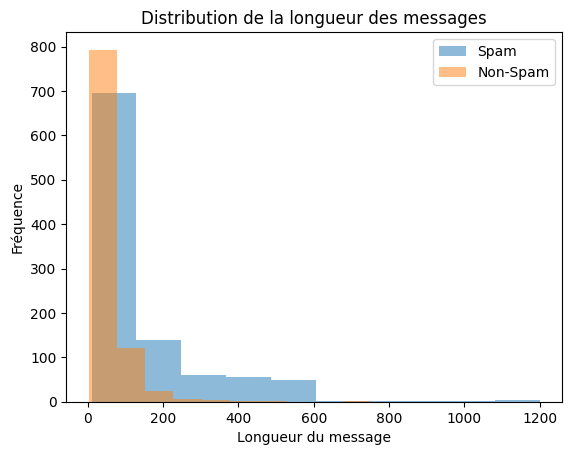

In [320]:
import matplotlib.pyplot as plt

# Afficher l'histogramme pour les messages en spam
plt.hist(df[df["CLASS"] == 1]["CONTENT_LENGTH"], alpha=0.5, label="Spam")

# Afficher l'histogramme pour les messages non-spam
plt.hist(df[df["CLASS"] != 1]["CONTENT_LENGTH"], alpha=0.5, label="Non-Spam")

# Ajouter un titre et des étiquettes aux axes
plt.title("Distribution de la longueur des messages")
plt.xlabel("Longueur du message")
plt.ylabel("Fréquence")

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

<!--
 Copyright 2024 ensai
 
 Licensed under the Apache License, Version 2.0 (the "License");
 you may not use this file except in compliance with the License.
 You may obtain a copy of the License at
 
     https://www.apache.org/licenses/LICENSE-2.0
 
 Unless required by applicable law or agreed to in writing, software
 distributed under the License is distributed on an "AS IS" BASIS,
 WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 See the License for the specific language governing permissions and
 limitations under the License.
-->



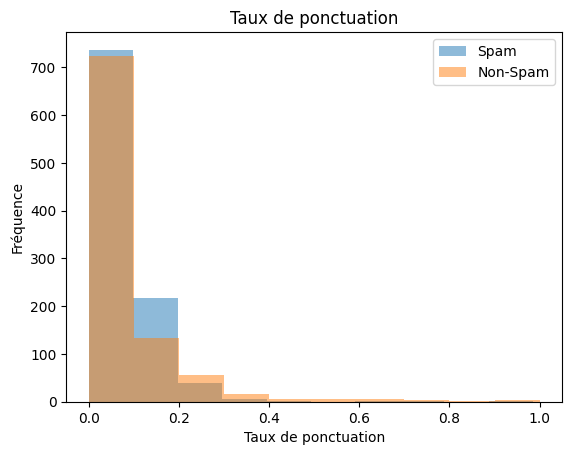

In [321]:
import matplotlib.pyplot as plt

# Afficher l'histogramme pour les messages en spam
plt.hist(df[df["CLASS"] == 1]["PUNCTUATION_RATE"], alpha=0.5, label="Spam")

# Afficher l'histogramme pour les messages non-spam
plt.hist(df[df["CLASS"] != 1]["PUNCTUATION_RATE"], alpha=0.5, label="Non-Spam")

# Ajouter un titre et des étiquettes aux axes
plt.title("Taux de ponctuation")
plt.xlabel("Taux de ponctuation")
plt.ylabel("Fréquence")

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

#### Remarques 

On a un chevauchement des histogrammes .
Cela indique que la variable "PUNCTUATION_RATE" n'est pas un bon prédicteur à elle seule pour différencier les commentaires spam des non spam.
Il y a probablement un recouvrement important entre les valeurs de cette variable pour les deux classes, rendant difficile une classification uniquement basée sur ce critère.

In [322]:
# Importer la fonction train_test_split depuis le module sklearn.model_selection
from sklearn.model_selection import train_test_split

# Définir une graine (seed) pour assurer la reproductibilité des résultats
seed = 123

# Diviser le DataFrame en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    df[["CONTENT", "CONTENT_LENGTH", "PUNCTUATION_RATE"]],  # Variables explicatives (contenu des commentaires)
    df["CLASS"],    # Variable d'intérêt (classe du commentaire : spam (1) ou non spam (0))
    test_size=0.2,  # Taille de l'ensemble de test (20% des données)
    random_state=seed  # Graine pour assurer la reproductibilité
)


In [323]:
from sklearn.feature_extraction.text import CountVectorizer

# Créer l'objet CountVectorizer
vectorizer = CountVectorizer()

# Ajuster et transformer les données d'entraînement
X_train_vectorized = vectorizer.fit_transform(X_train["CONTENT"].astype(str))

# Transformer les données de test
X_test_vectorized = vectorizer.transform(X_test["CONTENT"].astype(str))





In [324]:


# Créer X_train_content
X_train_content = pd.DataFrame(
    X_train_vectorized.toarray(),
    columns=vectorizer.get_feature_names_out()
)

# Créer X_train_final en concaténant les variables initiales et les features vectorisées
X_train_final = pd.concat([
    X_train[["CONTENT_LENGTH", "PUNCTUATION_RATE"]].reset_index(drop=True),
    X_train_content
], axis=1)

# Créer X_test_content
X_test_content = pd.DataFrame(
    X_test_vectorized.toarray(),
    columns=vectorizer.get_feature_names_out()
)

# Créer X_test_final en concaténant les variables initiales et les features vectorisées
X_test_final = pd.concat([
    X_test[["CONTENT_LENGTH", "PUNCTUATION_RATE"]].reset_index(drop=True),
    X_test_content
], axis=1)


In [325]:
X_test_final.head()


,CONTENT_LENGTH,PUNCTUATION_RATE,00,000,002,018,034,04,047000,05,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,29,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0.010309,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36,0.071429,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,233,0.078534,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
# Entraînement du modèle RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Définir un seed pour la reproductibilité des résultats
seed = 123
rf = RandomForestClassifier(random_state=seed)

# Entraîner le modèle sur les données d'entraînement transformées
rf_fitted = rf.fit(X_train_final, y_train)

# Évaluer les performances du modèle Random Forest sur les données de test
rf_score = rf_fitted.score(X_test_final, y_test)
print(f"Précision du modèle Random Forest : {rf_score:.2f}")



Précision du modèle Random Forest : 0.96


In [327]:
rf_fitted.score(X_train_final,Y_train)



1.0

In [328]:
rf_fitted.score(X_test_final,Y_test)

0.9591836734693877

Lorsqu'on parle de "vectoriser" les données dans le contexte de ce code, cela signifie convertir les données textuelles (comme le contenu des commentaires) en un format numérique qui peut être utilisé par des algorithmes d'apprentissage automatique.

In [329]:
from sklearn.metrics import classification_report

# Générer un rapport de classification détaillé
report = classification_report(Y_test, rf_fitted.predict(X_test_final))
print("Rapport de classification :")
print(report)



Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       187
           1       0.97      0.95      0.96       205

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392



In [330]:
# Réalisation de la validation croisée
from sklearn.model_selection import cross_val_score

score = cross_val_score(rf, X_train_final, Y_train, cv=3)

# Affichage des scores individuels de chaque pli
print("Scores de chaque pli :", score)

# Calcul de la moyenne des scores
score_moyen = score.mean()
print("Score moyen :", score_moyen)

# Calcul de la médiane des scores
score_median = np.median(score)
print("Médiane des scores :", score_median)




Scores de chaque pli : [0.95019157 0.95201536 0.94817658]
Score moyen : 0.9501278364869602
Médiane des scores : 0.9501915708812261


In [331]:
# Inference
# Définition du nouveau commentaire à analyser
new_comment1 = "join me to have fun on XX money"
new_comment2= "Earn extra cash on the side, sign up today!"
new_comment3 = "what a great video"
new_comment = new_comment3
# Calcul des caractéristiques du nouveau commentaire
new_data = pd.concat([
    # Longueur du contenu et taux de ponctuation
    pd.DataFrame({"CONTENT_LENGTH": [len(new_comment)], "PUNCTUATION_RATE": [count_punctuation(new_comment)]}),
    # Features vectorisées du nouveau commentaire
    pd.DataFrame(vectorizer.transform([new_comment]).toarray(), columns=vectorizer.get_feature_names_out())
], axis=1)



#### Remarques 

- Longueur du contenu et taux de ponctuation

Cette partie du code crée un DataFrame Pandas qui contient deux caractéristiques du nouveau commentaire new_comment1 :

    - CONTENT_LENGTH : La longueur du contenu du commentaire, calculée avec la fonction len(new_comment1).
    - PUNCTUATION_RATE : Le taux de ponctuation dans le commentaire, calculé avec une fonction count_punctuation(new_comment1) (qui n'est pas montrée ici, mais qui doit compter le nombre de signes de ponctuation dans le commentaire).

- Features vectorisées du nouveau commentaire

Cette partie du code crée un DataFrame Pandas qui contient les features vectorisées du nouveau commentaire new_comment1.

    - vectorizer.transform([new_comment1]) : Cette ligne utilise le vectorizer (probablement un objet TfidfVectorizer ou CountVectorizer) pour transformer le nouveau commentaire en un vecteur de features. Le résultat est une matrice sparse.
    - .toarray() : Cette méthode convertit la matrice sparse en un tableau Numpy dense.
    - columns=vectorizer.get_feature_names_out() : Cette ligne définit les noms de colonnes du DataFrame, en utilisant les noms de features générés par le vectorizer.


-Nb : Les features vectorisées, aussi appelées représentation vectorielle, sont une façon de représenter du texte sous forme numérique pour pouvoir l'utiliser dans des algorithmes de machine learning.

In [332]:
# Faire des prédictions avec le modèle entraîné
prediction = rf_fitted.predict(new_data)

# Afficher le résultat de la prédiction
print(f"Prédiction pour le nouveau commentaire : {'Spam' if prediction[0] == 1 else 'Non Spam'}")

Prédiction pour le nouveau commentaire : Non Spam


#### REmarques 

introduisons d'autres variables afin d'ameliorer le modele 

#### Nouvelles variables 

Présence de mots-clés spécifiques :

Les spams contiennent souvent des mots-clés récurrents liés à des offres commerciales, comme "gratuit", "gagnez", "remise", "limited edition", etc.
Ces termes sont utilisés pour attirer l'attention et susciter l'intérêt des destinataires.

Utilisation de liens et d'images :

Les spams incluent fréquemment des liens hypertextes et des images, souvent dans le but de rediriger les utilisateurs vers des sites web douteux.
La présence de nombreux liens et d'images peut être un signe caractéristique des messages spam.

Erreurs d'orthographe et de grammaire :

Les spams contiennent souvent de nombreuses fautes d'orthographe et de grammaire, reflétant un manque de relecture et de soin dans la rédaction.
Ce manque de qualité rédactionnelle peut être un indicateur de spam.



In [333]:
import re
from urllib.parse import urlparse

def detect_links(text):
    """
    Détecte la présence de liens hypertextes et d'images dans un texte.
    
    Paramètres :
    text (str) - Le texte à analyser.
    
    Retourne:
    float -  le nombre de liens .
    """
    # Détection des liens hypertextes
    link_pattern = r'https?://\S+|\www\.\S+'
    links = re.findall(link_pattern, text)
    link_count = len(links)
    
    
    return link_count

def detect_images(text):
    """
    Détecte la présence de liens hypertextes et d'images dans un texte.
    
    Paramètres :
    text (str) - Le texte à analyser.
    
    Retourne:
    float - le nombre d'images détectés.
    """
    
    # Détection des images
    image_pattern = r'!\[[^\]]*\]\([^\)]+\)'
    images = re.findall(image_pattern, text)
    image_count = len(images)
    
    return image_count




    




In [334]:


df["LINK_COUNT"] = df["CONTENT"].apply(lambda x : detect_links(x))
df["IMAGE_COUNT"] = df["CONTENT"].apply(lambda x : detect_images(x))
df



,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGTH,PUNCTUATION_RATE,LINK_COUNT,IMAGE_COUNT
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56,0.081633,0,0
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166,0.066667,0,0
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38,0.032258,0,0
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,0.078947,0,0
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,0.090909,0,0
...,...,...,...,...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,58,0.043478,0,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,93,0.039474,0,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,3,0.000000,0,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,23,0.000000,0,0


In [335]:

# Exemple d'utilisation
text = """
Visitez notre site web pour des offres incroyables : https://www.example.com
Ne manquez pas cette opportunité unique ! [Image de la promotion]
Cliquez ici pour en savoir plus : www.example.org
"""

link_count = detect_links(text)
print(f"Nombre de liens détectés : {link_count}")

Nombre de liens détectés : 2


In [336]:


commercial_keywords =  [
    "discount", "promotion", "sale", "special offer", "offer","savings", "unbeatable price",
    "best price","price" ,"discount", "coupon", "up to", "free delivery", "installment payment","payment",
    "limited offer", "new customer", "subscription", "flash sale","sale" ,"bulk buy", "gift",
    "free sample", "clearance", "liquidation", "markdown", "end-of-season sale", "early departure",
    "rebate", "preferential rate", "privilege", "free shipping", "no commitment",
    "satisfaction guaranteed or money back","money" ,"deal", "bargain", "steal", "exclusive",
    "limited time", "lowest price", "blowout", "mega sale", "clearance event",
    "hot deal", "big savings", "reduced price", "slashed prices", "closeout",'sale', 'offer', 'discount', 'deal', 'buy', 'shop', 'order', 'coupon', 'promotion'
]






In [337]:
import string

def count_commercial_keywords(text):
    """
    Calcule le taux de mots commerciaux dans un texte donné.
    
    Paramètres:
    text (str) - Le texte à analyser.
    
    Retourne:
    float - Le taux de mots commerciaux dans le texte.
    """
    commercial_keywords = {
        "discount", "promotion", "sale", "special offer", "offer", "savings", "unbeatable price",
        "best price", "price", "discount", "coupon", "up to", "free delivery", "installment payment",
        "payment", "limited offer", "new customer", "subscription", "flash sale", "sale", "bulk buy",
        "gift", "free sample", "clearance", "liquidation", "markdown", "end-of-season sale",
        "early departure", "rebate", "preferential rate", "privilege", "free shipping", "no commitment",
        "satisfaction guaranteed or money back", "money", "deal", "bargain", "steal", "exclusive",
        "limited time", "lowest price", "blowout", "mega sale", "clearance event", "hot deal",
        "big savings", "reduced price", "slashed prices", "closeout", "sale", "offer", "discount",
        "deal", "buy", "shop", "order", "coupon", "promotion"
    }
    
    # Initialisation des compteurs
    com_count = 0  # Nombre de mots commerciaux
    total_chars = 0  # Nombre total de caractères (hors espaces)
    # Conversion du texte en minuscules pour une recherche insensible à la casse
    text = text.lower()
    
    # Parcours du texte caractère par caractère
    for char in text:
        # Ignorer les signes de ponctuation
        if char in string.punctuation:
            continue
        # Incrémenter le compteur de caractères totaux (hors espaces)
        if char.isalnum():
            total_chars += 1
            # Vérifier si le texte contient l'un des mots commerciaux
            for keyword in commercial_keywords:
                if keyword in text:
                    com_count += 1
                    break
    
    # Calcul du taux de mots commerciaux
    if total_chars > 0:
        commercial_keywords_ratio = com_count / total_chars
    else:
        commercial_keywords_ratio = 0.0
    
    return commercial_keywords_ratio




In [338]:

df["COM_KEY_WORDS_RATIO"] = df["CONTENT"].apply(lambda x : count_commercial_keywords(x))
df
    

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGTH,PUNCTUATION_RATE,LINK_COUNT,IMAGE_COUNT,COM_KEY_WORDS_RATIO
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56,0.081633,0,0,0.0
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166,0.066667,0,0,0.0
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38,0.032258,0,0,0.0
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,0.078947,0,0,0.0
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,0.090909,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,58,0.043478,0,0,0.0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,93,0.039474,0,0,0.0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,3,0.000000,0,0,0.0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,23,0.000000,0,0,0.0


#### Pipeline

Un pipeline ML est une séquence structurée d'étapes qui automatise le flux de travail complet d'un projet de machine learning, depuis la récupération et le nettoyage des données jusqu'au déploiement du modèle final. Il permet de rendre le processus modulaire, reproductible et efficace, en facilitant la gestion des différentes tâches telles que :

- Récupération des données
- Nettoyage et préparation des données
- Standardisation et transformation des variables
- Encodage des variables catégorielles
- Construction et entraînement du modèle de machine learning
- Évaluation et optimisation du modèle
- Déploiement du modèle final

L'intérêt d'un pipeline est que toutes ces étapes sont regroupées dans un même objet. Cela permet de rendre le processus modulaire, reproductible et efficace, en automatisant la gestion de ces différentes tâches.

En effet, pour faire de nouvelles prédictions sur de nouvelles données, il est nécessaire de répéter ces mêmes étapes de prétraitement. En les encapsulant dans un pipeline, cela évite de devoir les faire manuellement à chaque fois, ce qui serait fastidieux et source d'erreurs.

Ainsi, l'utilisation d'un pipeline ML améliore grandement la rigueur et la fiabilité des projets d'apprentissage automatique.




L'objectif ici est de construire un objet qui prend directement un texte en entrée (test ou commentaire) et qui fournit en sortie une prédiction (spam ou pas spam).


In [347]:

# Importer la fonction train_test_split depuis le module sklearn.model_selection
from sklearn.model_selection import train_test_split

# Définir une graine (seed) pour assurer la reproductibilité des résultats
seed = 1234

# Diviser le DataFrame en ensembles d'entraînement et de test
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    df["CONTENT"],  # Variable explicative (contenu des commentaires)
    df["CLASS"],    # Variable d'intérêt (classe du commentaire : spam (1) ou non spam (0))
    test_size=0.2,  # Taille de l'ensemble de test (20% des données)
    random_state=seed  # Graine pour assurer la reproductibilité
)

In [340]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Création du pipeline
pipe = make_pipeline(
    # Étape 1 : Transformation du texte en matrice numérique
    CountVectorizer(),
    # Étape 2 : Entraînement d'un modèle de forêt aléatoire
    RandomForestClassifier(random_state=42)
)

# Affichage du pipeline
print(pipe)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [348]:
# Entraînement du pipeline sur les données d'apprentissage
pipe_fitted = pipe.fit(X_train1, Y_train1)

# Affichage du pipeline
pipe_fitted


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [351]:
# Évaluation des performances sur le jeu de données de test
score = pipe_fitted.score(X_test1, Y_test1)

# Affichage du score
print(f"Score sur le jeu de test : {score:.2f}")

Score sur le jeu de test : 0.96


Dans 96% des cas notre modele detecte les commentaire qui sont des spams


In [355]:
commentaire = "WHAT A GREAT VIDEO"

nouveau_commentaire =  commentaire
# Faire une prédiction sur une nouvelle donnée
prediction = pipe_fitted.predict([nouveau_commentaire])

# Afficher la prédiction
print(f"Prédiction pour le nouveau commentaire '{nouveau_commentaire}': {'Spam' if prediction[0] == 1 else 'Non Spam'}")

Prédiction pour le nouveau commentaire 'WHAT A GREAT VIDEO': Non Spam


##### Validation croisée


In [367]:
from sklearn.model_selection import cross_val_score

# Validation croisée du pipeline entraîné
score_pipe_fitted = cross_val_score(pipe_fitted , X_train, Y_train, cv =3) # toujours faire un nombre impaire de plis

# Calcul de la déviation standard
std_pipe_fitted = np.std(score_pipe_fitted)

# Affichage des scores de validation croisée
print(f"Scores de validation croisée : {score_pipe_fitted}")
print(f"Moyenne des scores : {score_pipe_fitted.mean():.2f}")
print(f"Déviation standard des scores : {std_pipe_fitted:.2f}")


Scores de validation croisée : [0.94061303 0.9596929  0.95009597]
Moyenne des scores : 0.95
Déviation standard des scores : 0.01


In [368]:
# Interprétation des résultats
if score_pipe_fitted.mean() > 0.8:
    print("Le modèle a de très bonnes performances.")
elif score_pipe_fitted.mean() > 0.7:
    print("Le modèle a de bonnes performances.")
else:
    print("Les performances du modèle sont moyennes.")

if std_pipe_fitted < 0.05:
    print("Le modèle a des performances stables d'un pli à l'autre.")
elif std_pipe_fitted < 0.1:
    print("Le modèle a une variabilité modérée des performances.")
else:
    print("Le modèle a une forte variabilité des performances d'un pli à l'autre.")

Le modèle a de très bonnes performances.
Le modèle a des performances stables d'un pli à l'autre.


In [369]:
# Affichage du pipeline
print(pipe)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [370]:
# reglage des hyperparametres

parameters = {
    "countvectorizer__max_features" : (None, 1000, 2000),
    "countvectorizer__ngram_range" : ((1,1),(1,2)) ,
    "countvectorizer__stop_words" : (None,"english"),
    'randomforestclassifier__n_estimators' : (50,100,200)
    
}
parameters

{'countvectorizer__max_features': (None, 1000, 2000),
 'countvectorizer__ngram_range': ((1, 1), (1, 2)),
 'countvectorizer__stop_words': (None, 'english'),
 'randomforestclassifier__n_estimators': (50, 100, 200)}

Le dictionnaire parameters que vous avez fourni contient les paramètres à explorer pour l'optimisation du pipeline de votre modèle

Lors de l'optimisation des hyperparamètres, le modèle sera entraîné et évalué avec toutes les combinaisons possibles de ces paramètres, afin de trouver la configuration offrant les meilleures performances sur les données de validation.

In [374]:
from sklearn.model_selection import GridSearchCV

# Recherche des meilleurs hyperparamètres avec GridSearchCV
search_model = GridSearchCV(pipe, parameters, cv=3, n_jobs=-1)
search_model.fit(X_train, Y_train)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': (None, 1000, 2000),
                         'countvectorizer__ngram_range': ((1, 1), (1, 2)),
                         'countvectorizer__stop_words': (None, 'english'),
                         'randomforestclassifier__n_estimators': (50, 100,
                                                                  200)})

In [375]:
# Affichage des meilleurs hyperparamètres et du meilleur score
print("Meilleurs hyperparamètres :", search_model.best_params_)
print("Meilleur score :", search_model.best_score_)

Meilleurs hyperparamètres : {'countvectorizer__max_features': 2000, 'countvectorizer__ngram_range': (1, 1), 'countvectorizer__stop_words': 'english', 'randomforestclassifier__n_estimators': 50}
Meilleur score : 0.9584427236157992


##### Remarques 
L'objectif de ce code est de trouver la meilleure combinaison d'hyperparamètres pour votre modèle en explorant de manière exhaustive toutes les possibilités définies dans le dictionnaire parameters. La validation croisée (cv=3) permet d'évaluer les performances du modèle de manière robuste sur plusieurs sous-ensembles des données.

En utilisant tous les cœurs de calcul disponibles (n_jobs=-1), le processus d'optimisation sera beaucoup plus rapide, car les différentes combinaisons d'hyperparamètres pourront être évaluées en parallèle.

Une fois la recherche terminée, l'objet search_model contiendra les meilleurs hyperparamètres et le meilleur score de validation, que vous pourrez ensuite utiliser pour entraîner votre modèle final.


In [377]:
# Importer la bibliothèque joblib pour sérialiser/désérialiser les objets
import joblib

# Sauvegarder le meilleur estimateur (modèle) obtenu avec GridSearchCV
joblib.dump(
    value=search_model.best_estimator_,  # Récupérer le meilleur estimateur
    filename="detecteur_spam.pkl"  # Spécifier le nom du fichier de sauvegarde
)


['detecteur_spam.pkl']

In [380]:
#chargement du modele

loaded_model = joblib.load(filename="detecteur_spam.pkl")


loaded_model.predict(["thank you for this video"])

array([0])

In [381]:
# Chargement du modèle enregistré
loaded_model = joblib.load(filename="detecteur_spam.pkl")

# Préparation de nouvelles entrées à prédire
new_text1 = "Huh, anyway check out this you[tube] channel: kobyoshi02"
new_text2 = "Earn extra cash on the side, sign up today!"

# Prédiction avec le modèle entraîné
prediction1 = loaded_model.predict([new_text1])
prediction2 = loaded_model.predict([new_text2])

# Affichage et interprétation des prédictions
if prediction1[0] == 1:
    print("La première nouvelle entrée est prédite comme spam.")
else:
    print("La première nouvelle entrée est prédite comme non-spam.")

if prediction2[0] == 1:
    print("La deuxième nouvelle entrée est prédite comme spam.")
else:
    print("La deuxième nouvelle entrée est prédite comme non-spam.")

La première nouvelle entrée est prédite comme spam.
La deuxième nouvelle entrée est prédite comme non-spam.


In [383]:
import pandas as pd

data_essaie = {
    'content': [
        "Watch this video: https://www.youtube.com/watch?v=vtaRGgvGtWQ",
        "Check this out, just for test I have to say murdev.com",
        "Hey guys, check out my new channel and subscribe!",
        "Make money fast from home, click here!",
        "Free iPhone giveaway, click now!",
        "Limited time offer, buy one get one free!",
        "Make $1000 a day working from home!",
        "Get rich quick with this one simple trick!",
        "Earn extra cash on the side, sign up today!",
        "Lose weight fast with this secret method!",
        "Cheap Viagra, click here to order now!",
        "Earn $5000 a month from your couch!",
        "Work from home and make millions!",
        "Get a free iPad, click here to claim!",
        "Guaranteed weight loss, order now!",
        "This video is amazing, you have to watch it!",
        "I really enjoyed this tutorial, great job!",
        "Awesome content, keep it up!",
        "I learned so much from this video, thank you!",
        "Subscribed, this channel is fantastic!",
        "Very helpful, I appreciate you sharing this!",
        "Great video, I found it very informative.",
        "Fantastic tutorial, I'll be back for more!",
        "I can't believe how useful this was, wow!",
        "Loved this video, the best I've seen on this topic.",
        "This is such a great channel, I'm impressed!",
        "Extremely helpful, thank you for making this!",
        "Brilliant video, you're doing an amazing job.",
        "I really enjoyed this content, well done!",
        "Subscribed, looking forward to more great videos."
    ]
}

data= pd.DataFrame(data_essaie)

# Ajouter une colonne 'is_spam' pour identifier les commentaires spam
data['is_spam'] = [1 if i < 15 else 0 for i in range(len(data))]

print(data)

                                              content  is_spam
0   Watch this video: https://www.youtube.com/watc...        1
1   Check this out, just for test I have to say mu...        1
2   Hey guys, check out my new channel and subscribe!        1
3              Make money fast from home, click here!        1
4                    Free iPhone giveaway, click now!        1
5           Limited time offer, buy one get one free!        1
6                 Make $1000 a day working from home!        1
7          Get rich quick with this one simple trick!        1
8         Earn extra cash on the side, sign up today!        1
9           Lose weight fast with this secret method!        1
10             Cheap Viagra, click here to order now!        1
11                Earn $5000 a month from your couch!        1
12                  Work from home and make millions!        1
13              Get a free iPad, click here to claim!        1
14                 Guaranteed weight loss, order now!  

In [385]:
# Choisir aléatoirement 10 commentaires
random_comments = data.sample(n=10, random_state=1234)

print(random_comments)



                                              content  is_spam
7          Get rich quick with this one simple trick!        1
10             Cheap Viagra, click here to order now!        1
4                    Free iPhone giveaway, click now!        1
1   Check this out, just for test I have to say mu...        1
28          I really enjoyed this content, well done!        0
8         Earn extra cash on the side, sign up today!        1
3              Make money fast from home, click here!        1
23          I can't believe how useful this was, wow!        0
14                 Guaranteed weight loss, order now!        1
13              Get a free iPad, click here to claim!        1


In [386]:
# Tester des prédictions sur de nouvelles entrées

correct_predictions = 0
total_predictions = 0

for i, new_text in enumerate(random_comments['content']):
    
    prediction = loaded_model.predict([new_text])
    
    if prediction[0] == random_comments.iloc[i]['is_spam']:
        correct_predictions += 1
    total_predictions += 1
    if prediction[0] != random_comments.iloc[i]['is_spam']:
        print(f"Mauvaise prédiction pour le commentaire {i}: {new_text}")
    else:
        print(f"Bonne prédiction pour le commentaire {i}: {new_text}")

proportion_correct = correct_predictions / total_predictions
print(f"Proportion de bonnes prédictions: {proportion_correct:.2f}")

Mauvaise prédiction pour le commentaire 0: Get rich quick with this one simple trick!
Mauvaise prédiction pour le commentaire 1: Cheap Viagra, click here to order now!
Bonne prédiction pour le commentaire 2: Free iPhone giveaway, click now!
Bonne prédiction pour le commentaire 3: Check this out, just for test I have to say murdev.com
Bonne prédiction pour le commentaire 4: I really enjoyed this content, well done!
Mauvaise prédiction pour le commentaire 5: Earn extra cash on the side, sign up today!
Bonne prédiction pour le commentaire 6: Make money fast from home, click here!
Bonne prédiction pour le commentaire 7: I can't believe how useful this was, wow!
Mauvaise prédiction pour le commentaire 8: Guaranteed weight loss, order now!
Bonne prédiction pour le commentaire 9: Get a free iPad, click here to claim!
Proportion de bonnes prédictions: 0.60


In [387]:
# Analyser les faux positifs
false_positives = []
false_negatives = []

for i, new_text in enumerate(random_comments['content']):
    
    prediction = loaded_model.predict([new_text])[0]
    actual_label = random_comments.iloc[i]['is_spam']
    
    if prediction == 1 and actual_label == 0:
        false_positives.append((new_text, prediction, actual_label))
    elif prediction == 0 and actual_label == 1:
        false_negatives.append((new_text, prediction, actual_label))

print("Faux positifs:")
for comment, pred, actual in false_positives:
    print(f"Commentaire: {comment}")
    print(f"Prédiction: {pred}, Actual: {actual}")
    print()

print("Faux négatifs:")
for comment, pred, actual in false_negatives:
    print(f"Commentaire: {comment}")
    print(f"Prédiction: {pred}, Actual: {actual}")
    print()

# Analyser les caractéristiques des faux positifs
print("Caractéristiques des faux positifs:")
for comment, _, _ in false_positives:
    print(f"Commentaire: {comment}")
    print(f"Mots clés potentiellement problématiques: {', '.join([w for w in comment.split() if w in vectorizer.get_feature_names_out()])}")
    print()

Faux positifs:
Faux négatifs:
Commentaire: Get rich quick with this one simple trick!
Prédiction: 0, Actual: 1

Commentaire: Cheap Viagra, click here to order now!
Prédiction: 0, Actual: 1

Commentaire: Earn extra cash on the side, sign up today!
Prédiction: 0, Actual: 1

Commentaire: Guaranteed weight loss, order now!
Prédiction: 0, Actual: 1

Caractéristiques des faux positifs:


In [ ]:
# Faire des prédictions sur les données de test
Y_pred = rf_fitted.predict(X_test_vectorized)
Y_pred_proba = rf_fitted.predict_proba(X_test_vectorized)[:, 1]

# Identifier les faux positifs
fp_idx = np.where((Y_test == 0) & (Y_pred == 1))[0]
# Identifier les vrais positifs
vp_idx = np.where((Y_test == 1) & (Y_pred == 1))[0]
# Récupérer les scores de prédiction des faux positifs
fp_scores = Y_pred_proba[fp_idx]

# Récupérer les scores de prédiction des vrai positifs
vp_scores = Y_pred_proba[vp_idx]

fp_scores

array([0.68, 0.53, 0.73, 0.61])

#### Remarques
L'interprétation des scores de prédiction des faux positifs fp_scores peut vous donner des informations importantes sur les performances de votre modèle de classification. Voici quelques points à prendre en compte :

Valeurs élevées des scores de prédiction des faux positifs :

Les valeurs élevées (proches de 1) indiquent que le modèle a une grande confiance dans ses prédictions erronées, classant à tort des échantillons non-spam comme spam.
Cela signifie que le modèle a du mal à bien différencier les vrais positifs des faux positifs, ce qui peut entraîner un nombre élevé de faux positifs.

Dispersion des scores de prédiction des faux positifs :
Si les scores de prédiction des faux positifs sont dispersés sur une large plage de valeurs (par exemple, de 0,2 à 0,8), cela suggère que le modèle a une difficulté variable à distinguer les vrais positifs des faux positifs.
Une dispersion importante peut indiquer que le modèle a besoin d'être amélioré pour mieux discriminer les échantillons.

Comparaison avec les scores de prédiction des vrais positifs :
Il peut être intéressant de comparer la distribution des scores de prédiction des faux positifs avec celle des vrais positifs (échantillons correctement classés comme spam).
Si les distributions se chevauchent de manière significative, cela montre que le modèle a du mal à bien séparer les deux classes.

Analyse de la courbe ROC et de la métrique AUC :
Les scores de prédiction des faux positifs peuvent également être utilisés pour tracer la courbe ROC (Receiver Operating Characteristic) et calculer la métrique AUC (Area Under the Curve).
L'AUC est une mesure globale des performances du modèle et peut vous aider à évaluer sa capacité à bien discriminer les deux classes.

In [ ]:
# Copyright 2024 ensai
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     https://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.



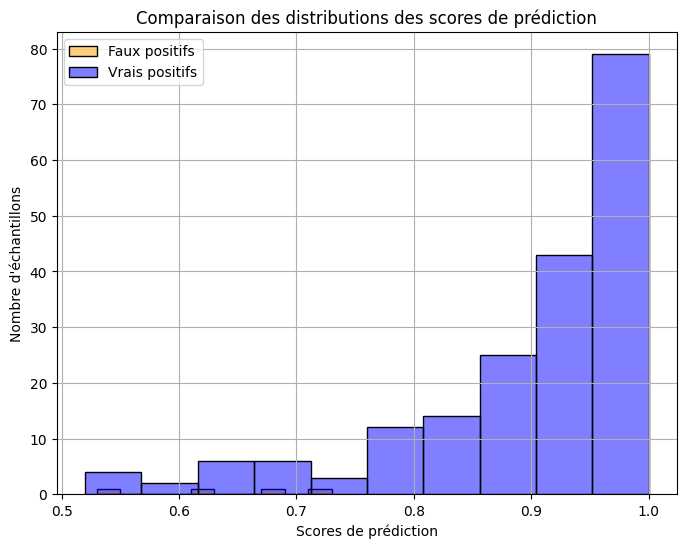

Chevauchement des distributions : 1.00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer l'histogramme des deux distributions
plt.figure(figsize=(8, 6))
sns.histplot(fp_scores, bins=10, color='orange', alpha=0.5, label='Faux positifs')
sns.histplot(vp_scores, bins=10, color='blue', alpha=0.5, label='Vrais positifs')
plt.xlabel('Scores de prédiction')
plt.ylabel('Nombre d\'échantillons')
plt.title('Comparaison des distributions des scores de prédiction')
plt.legend()
plt.grid()
plt.show()

# Calculer le chevauchement des distributions
fp_hist, fp_bins = np.histogram(fp_scores, bins=10)
vp_hist, vp_bins = np.histogram(vp_scores, bins=10)
overlap = np.minimum(fp_hist, vp_hist).sum() / min(len(fp_scores), len(vp_scores))
print(f'Chevauchement des distributions : {overlap:.2f}')

Valeur du chevauchement :
Le chevauchement varie entre 0 et 1.
Une valeur de 0 signifie qu'il n'y a aucun chevauchement entre les deux distributions, ce qui est idéal. Cela indique que le modèle peut parfaitement distinguer les faux positifs des vrais positifs.
Une valeur de 1 signifie que les deux distributions se chevauchent complètement, ce qui est le pire cas. Cela indique que le modèle n'arrive pas à différencier les faux positifs des vrais positifs.
Interprétation du chevauchement :
Plus le chevauchement est faible, mieux le modèle peut distinguer les faux positifs des vrais positifs.
Un faible chevauchement indique que les scores de prédiction des faux positifs et des vrais positifs sont bien séparés, ce qui se traduit par de meilleures performances du modèle.
Un chevauchement élevé signifie que les scores de prédiction des faux positifs et des vrais positifs se recouvrent, rendant plus difficile la distinction entre les deux classes. Cela se traduit par de moins bonnes performances du modèle.


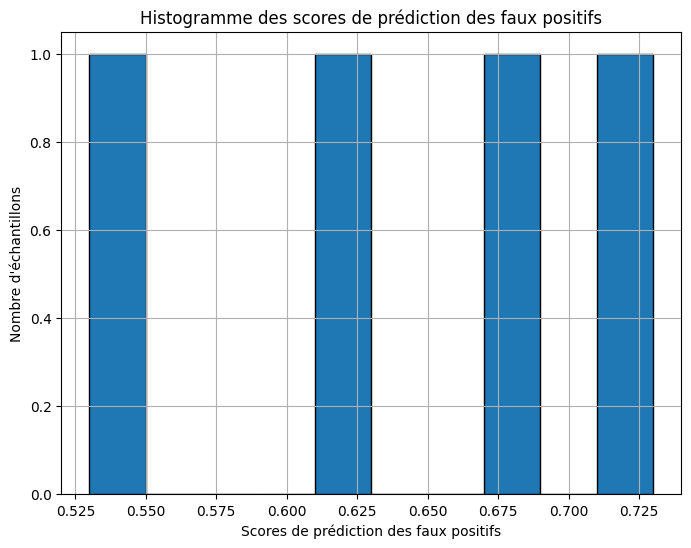

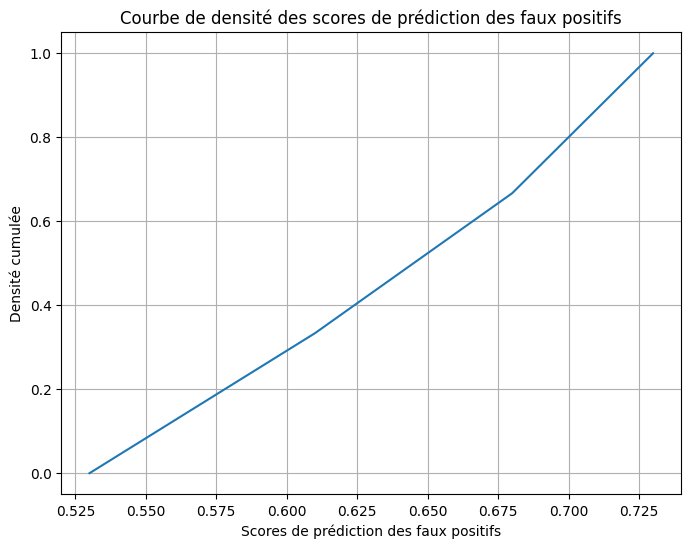

In [ ]:
# Tracer l'histogramme
plt.figure(figsize=(8, 6))
plt.hist(fp_scores, bins=10, edgecolor='black')
plt.xlabel('Scores de prédiction des faux positifs')
plt.ylabel('Nombre d\'échantillons')
plt.title('Histogramme des scores de prédiction des faux positifs')
plt.grid()
plt.show()

# Tracer la courbe de densité
plt.figure(figsize=(8, 6))
plt.plot(np.sort(fp_scores), np.linspace(0, 1, len(fp_scores)))
plt.xlabel('Scores de prédiction des faux positifs')
plt.ylabel('Densité cumulée')
plt.title('Courbe de densité des scores de prédiction des faux positifs')
plt.grid()
plt.show()